Importarea librariilor necesare

In [405]:
import os
import subprocess
import pandas as pd #pt citirea cvs-ului
from sklearn import tree #pt DecisionTreeClassifier
import matplotlib.pyplot as plt #pt a face ploturi
from sklearn.preprocessing import LabelEncoder #pentru preprocesarea datelor
from sklearn.model_selection import train_test_split #pentru impartirea setului de date in train si test
import graphviz #pt a reprezenta grafic DecisionTree-ul
import seaborn as sns #pt vizualizarea datelor statistice
from sklearn.metrics import * #pt metrici
from dtreeviz.trees import *
import numpy as np




Incarcare dataset, prezentare dataset

In [406]:
input_file = "drug200.csv"
# comma delimited is the default
#read_csv method - Read a comma-separated values (csv) file into DataFrame.
data = pd.read_csv(input_file, header = 0)

In [407]:
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [408]:
data.shape
#dimensiunea datelor

(200, 6)

In [409]:
data.columns
#coloanele

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [410]:
data.head()
#returns top n rows of a DataFrame or Series where n is a user input value

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [411]:
data.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

Explorarea datelor din dataset

In [412]:
data['Sex']

0      F
1      M
2      M
3      F
4      F
      ..
195    F
196    M
197    M
198    M
199    F
Name: Sex, Length: 200, dtype: object

In [413]:
#Cate peroane sunt de sex feminin respectiv masculin
data.Sex.value_counts()

M    104
F     96
Name: Sex, dtype: int64

In [414]:
#Cum este impartit blood pressure-ul in dataset
data.BP.value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

In [415]:
data.Cholesterol.value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

Distributia datelor in dataset, reprezentata grafic

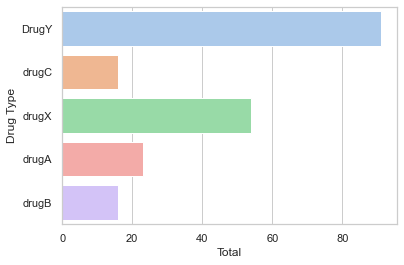

In [416]:
# Tipul de medicament folosit
sns.set_theme(style="whitegrid")
sns.countplot(y="Drug", data=data, palette="pastel")
plt.ylabel('Drug Type')
plt.xlabel('Total')
plt.show()

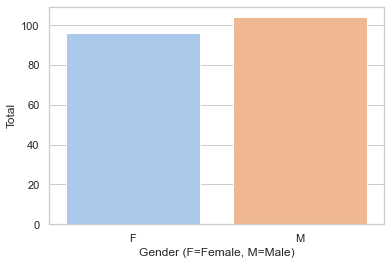

In [417]:
# Sexul distribuit in dataset
sns.set_theme(style="whitegrid")
sns.countplot(x="Sex", data=data, palette="pastel")
plt.xlabel('Gender (F=Female, M=Male)')
plt.ylabel('Total')
plt.show()

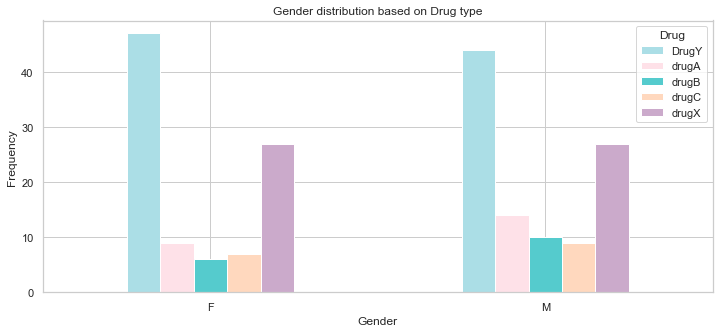

In [418]:
# Distributia sexului in functie de edicamentul administrat

pd.crosstab(data.Sex,data.Drug).plot(kind="bar",figsize=(12,5),color=['#ABDEE6','#FEE1E8','#55CBCD','#FFD8BE','#CBAACB'])
plt.title('Gender distribution based on Drug type')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

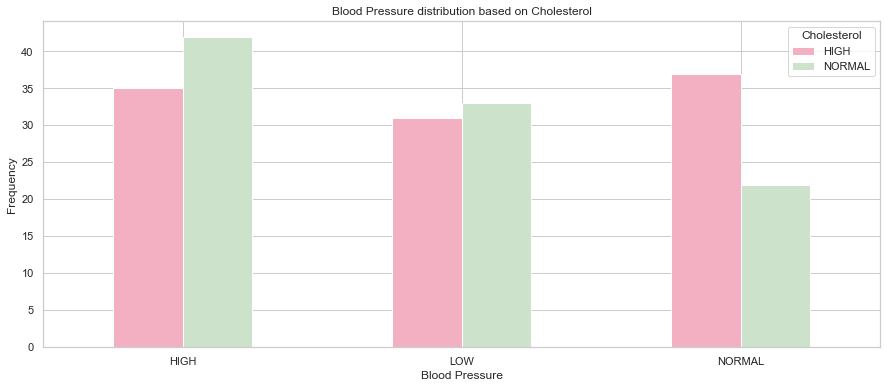

In [419]:
# Tensiunea in functie de nivelul de colesterol
pd.crosstab(data.BP,data.Cholesterol).plot(kind="bar",figsize=(15,6),color=['#F3B0C3','#CCE2CB'])
plt.title('Blood Pressure distribution based on Cholesterol')
plt.xlabel('Blood Pressure')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

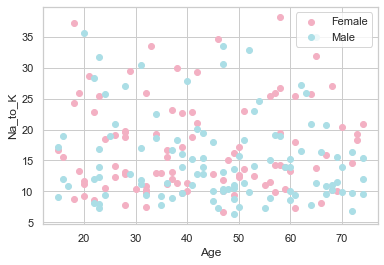

In [420]:
# Distributia sodiului si a potasiului in functie de sex 
plt.scatter(x=data.Age[data.Sex=='F'], y=data.Na_to_K[(data.Sex=='F')], c="#F3B0C3")
plt.scatter(x=data.Age[data.Sex=='M'], y=data.Na_to_K[(data.Sex=='M')], c="#ABDEE6")
plt.legend(["Female", "Male"])
plt.xlabel("Age")
plt.ylabel("Na_to_K")
plt.show()

Preprocesare: one hot encoder si label encoder

In [421]:
#ONE HOT ENCODER
df_1=pd.get_dummies(data=data,columns=["BP","Cholesterol",'Sex'],drop_first=True)

In [422]:
df_1.head()

,Age,Na_to_K,Drug,BP_LOW,BP_NORMAL,Cholesterol_NORMAL,Sex_M
0,23,25.355,DrugY,0,0,0,0
1,47,13.093,drugC,1,0,0,1
2,47,10.114,drugC,1,0,0,1
3,28,7.798,drugX,0,1,0,0
4,61,18.043,DrugY,1,0,0,0


In [423]:
#Label encoder
c1='Drug'
label_encoder = LabelEncoder() 
df_1[c1]= label_encoder.fit_transform(df_1[c1]) 
df_1[c1].unique()
df_1

,Age,Na_to_K,Drug,BP_LOW,BP_NORMAL,Cholesterol_NORMAL,Sex_M
0,23,25.355,0,0,0,0,0
1,47,13.093,3,1,0,0,1
2,47,10.114,3,1,0,0,1
3,28,7.798,4,0,1,0,0
4,61,18.043,0,1,0,0,0
...,...,...,...,...,...,...,...
195,56,11.567,3,1,0,0,0
196,16,12.006,3,1,0,0,1
197,52,9.894,4,0,1,0,1
198,23,14.020,4,0,1,1,1


Impartirea datelor in training si test

In [424]:
# Split data into training and test

X = df_1.drop(['Drug','Age'],axis = 1)
y = df_1['Drug']

In [425]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [426]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(134, 5)
(134,)
(66, 5)
(66,)


DecisionTree, criteriu: entropy

In [427]:
#DecisionTree:entropy
drugdecisiontree = tree.DecisionTreeClassifier(criterion="entropy")
drugdecisiontree

DecisionTreeClassifier(criterion='entropy')

In [428]:
drugdecisiontree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

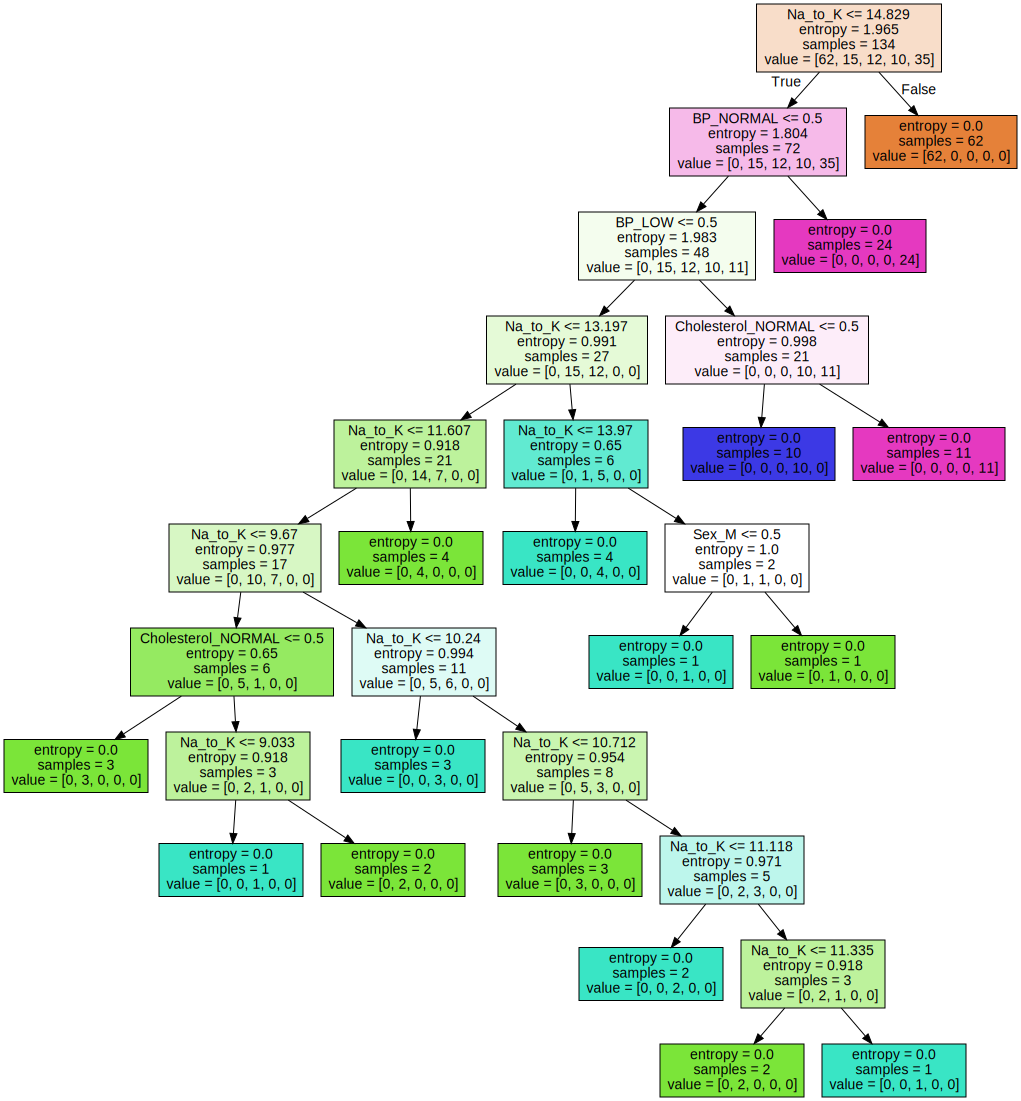

In [429]:
dot_data = tree.export_graphviz(drugdecisiontree, out_file = None, feature_names=X.columns, filled=True)
graph1 = graphviz.Source(dot_data)
graph1

C:\Users\Stefana\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


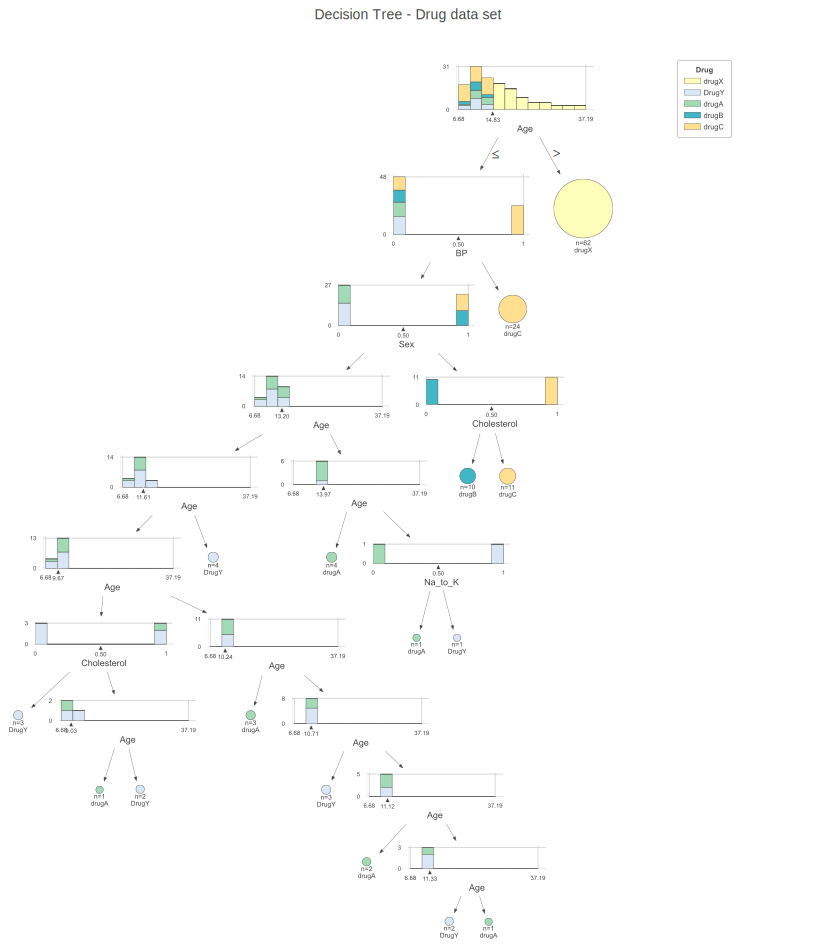

In [430]:
viz = dtreeviz(drugdecisiontree, 
               x_data=X_train,
               y_data=y_train,
               target_name='Drug',
               feature_names=["Age","Sex","BP","Cholesterol","Na_to_K"], 
               class_names=["drugX","DrugY","drugA","drugB","drugC"],
               title="Decision Tree - Drug data set")
viz

Prediction

In [431]:
# PREDICTION
pred = drugdecisiontree.predict(X_test)

In [432]:
pred

array([4, 0, 4, 3, 0, 0, 0, 4, 1, 4, 1, 4, 0, 2, 2, 0, 2, 4, 3, 0, 1, 4,
       4, 0, 0, 0, 3, 4, 0, 4, 0, 3, 3, 0, 2, 0, 4, 1, 0, 1, 4, 4, 4, 0,
       0, 3, 0, 0, 0, 4, 4, 0, 4, 0, 4, 0, 2, 0, 0, 0, 1, 0, 1, 0, 4, 0])

In [433]:
# compare the result of predtree with y_test set
print(pred[0:5])
print(y_test[0:5])

[4 0 4 3 0]
95     4
15     0
30     4
158    3
128    0
Name: Drug, dtype: int32


In [434]:
drugdecisiontree.predict_proba(X_test)

array([[0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0.

In [435]:
from sklearn.metrics import RocCurveDisplay
 
fprate, tprate, thresholds = roc_curve(y_test, pred, pos_label=5)
print(fprate)
print(tprate)
print(thresholds)

[0.         0.28787879 0.37878788 0.45454545 0.56060606 1.        ]
[nan nan nan nan nan nan]
[5 4 3 2 1 0]


C:\Users\Stefana\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


In [436]:
 #Return the mean accuracy on the given test data and labels

In [437]:
print("Accuracy score for Decision Tree Classifier is:")
print(drugdecisiontree.score(X,y))



Accuracy score for Decision Tree Classifier is:
0.975


Metrics

<AxesSubplot:>

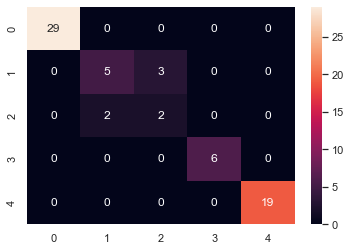

In [438]:

#METRICA 1- confusion matrix

sns.heatmap(confusion_matrix(y_test, pred),annot=True)



In [439]:
#METRICA 2- f1_score
#F1 = 2 * (precision * recall) / (precision + recall)
print("F1 score for Decision Tree Classifier is:")
entropy_f1 = f1_score(y_test, pred, average='macro')
entropy_f1

F1 score for Decision Tree Classifier is:


0.8222222222222222

In [440]:
#METRICA 3-recall score
print("recall score for Decision Tree Classifier is:")
entropy_recall = recall_score(y_test, pred, average=None)
entropy_recall


recall score for Decision Tree Classifier is:


array([1.   , 0.625, 0.5  , 1.   , 1.   ])

In [441]:
#METRICA 4- accuracy score:this function computes subset accuracy: the set of labels predicted for a sample 
# must exactly match the corresponding set of labels in y_test.

entropy_accuracy = accuracy_score(y_test,pred)
entropy_accuracy

0.9242424242424242

In [442]:
#METRICA 5- Precision
#Precision explains how many of the correctly predicted cases actually turned out to be positive
print(precision_score(y_test, pred, average=None))

[1.         0.71428571 0.4        1.         1.        ]


Classification report: Decision tree-gini

In [443]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       0.71      0.62      0.67         8
           2       0.40      0.50      0.44         4
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00        19

    accuracy                           0.92        66
   macro avg       0.82      0.82      0.82        66
weighted avg       0.93      0.92      0.93        66



Decision tree: gini

In [444]:
#DecisionTree:gini
drugdecisiontree2 = tree.DecisionTreeClassifier(criterion="gini")
drugdecisiontree2


DecisionTreeClassifier()

In [445]:
drugdecisiontree2.fit(X_train, y_train)

DecisionTreeClassifier()

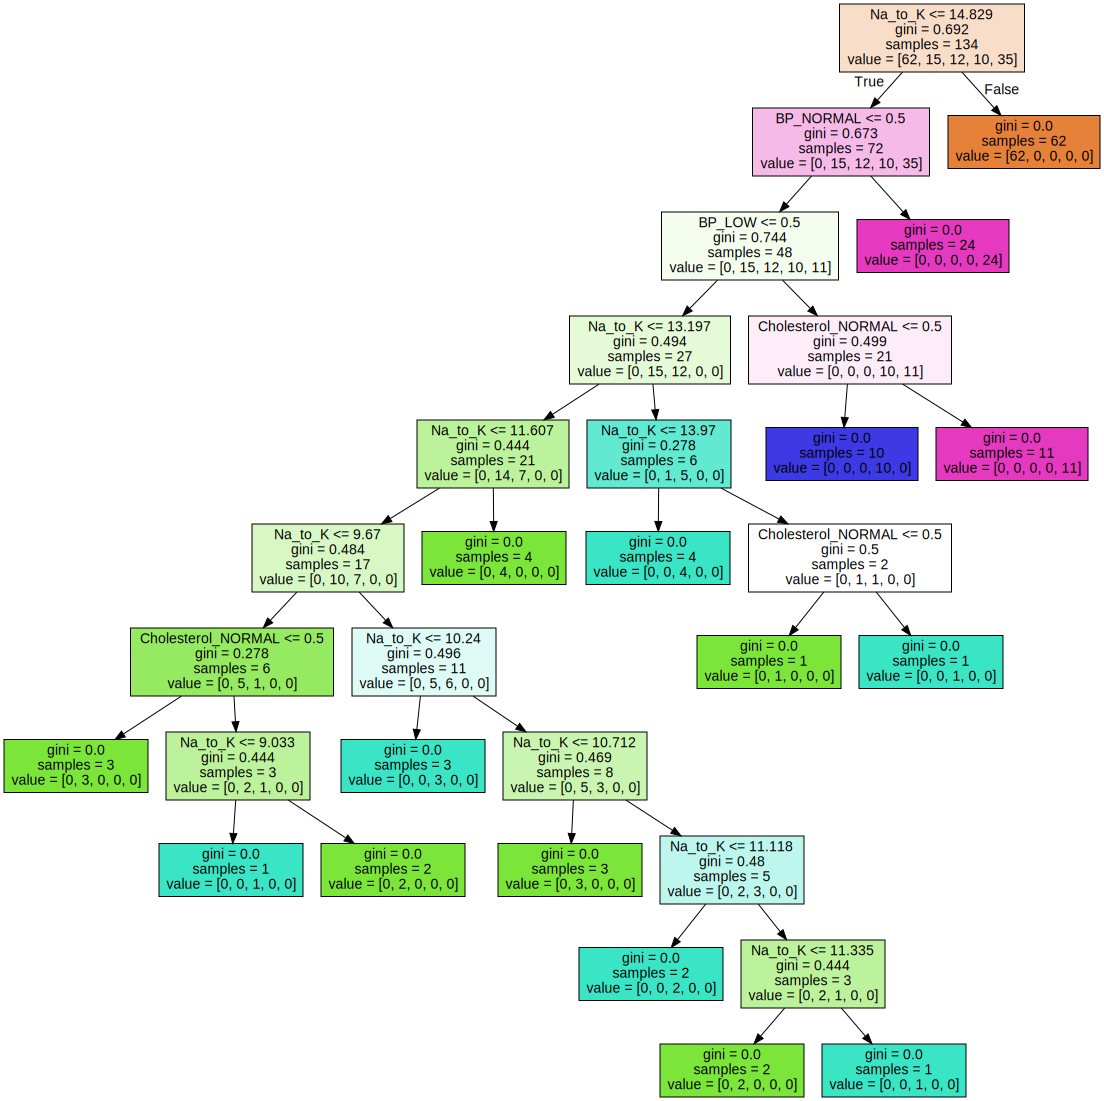

In [446]:

dot_data = tree.export_graphviz(drugdecisiontree2, out_file = None, feature_names=X.columns, filled=True)
graph2 = graphviz.Source(dot_data)
graph2

C:\Users\Stefana\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


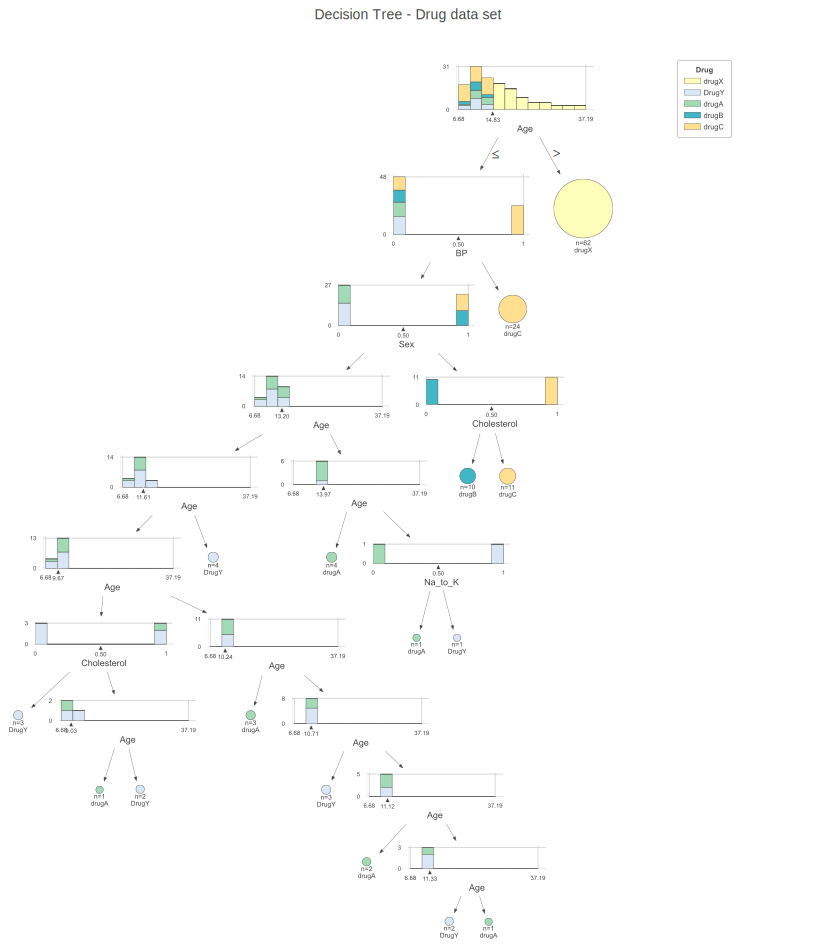

In [447]:

viz = dtreeviz(drugdecisiontree, 
               x_data=X_train,
               y_data=y_train,
               target_name='Drug',
               feature_names=["Age","Sex","BP","Cholesterol","Na_to_K"], 
               class_names=["drugX","DrugY","drugA","drugB","drugC"],
               title="Decision Tree - Drug data set")
viz


In [448]:
X_train

,Na_to_K,BP_LOW,BP_NORMAL,Cholesterol_NORMAL,Sex_M
42,15.790,0,1,1,1
189,20.932,0,0,1,1
90,16.594,0,1,0,1
136,10.977,0,0,0,0
51,10.898,0,1,1,1
...,...,...,...,...,...
106,11.953,0,1,0,1
14,12.703,0,1,0,0
92,29.450,0,0,0,0
179,15.891,0,1,0,0


In [449]:
y_train

42     0
189    0
90     0
136    2
51     4
      ..
106    4
14     4
92     0
179    0
102    3
Name: Drug, Length: 134, dtype: int32

In [450]:
pred2 = drugdecisiontree2.predict(X_test)

In [451]:
pred2

array([4, 0, 4, 3, 0, 0, 0, 4, 1, 4, 1, 4, 0, 2, 2, 0, 2, 4, 3, 0, 1, 4,
       4, 0, 0, 0, 3, 4, 0, 4, 0, 3, 3, 0, 2, 0, 4, 1, 0, 1, 4, 4, 4, 0,
       0, 3, 0, 0, 0, 4, 4, 0, 4, 0, 4, 0, 2, 0, 0, 0, 1, 0, 1, 0, 4, 0])

In [452]:
# compare the result of predtree with y_test set
print(pred2[0:5])
print(y_test[0:5])

[4 0 4 3 0]
95     4
15     0
30     4
158    3
128    0
Name: Drug, dtype: int32


In [453]:
drugdecisiontree2.predict_proba(X_test)

array([[0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0.

<AxesSubplot:>

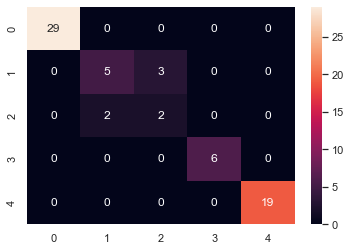

In [454]:
#METRICA 1- confusion matrix
sns.heatmap(confusion_matrix(y_test, pred),annot=True)

In [455]:
#METRICA 2- f1_score
#F1 = 2 * (precision * recall) / (precision + recall)
print("F1 score for Decision Tree Classifier is:")
gini_f1 = f1_score(y_test, pred, average='macro')
gini_f1

F1 score for Decision Tree Classifier is:


0.8222222222222222

In [456]:
#METRICA 3-recall score
print("recall score for Decision Tree Classifier is:")
gini_recall = recall_score(y_test, pred, average='macro')
gini_recall

recall score for Decision Tree Classifier is:


0.825

In [457]:
#METRICA 4- accuracy score:this function computes subset accuracy: the set of labels predicted for a sample 
# must exactly match the corresponding set of labels in y_test.
gini_accuracy = accuracy_score(y_test,pred)

In [458]:
#METRICA 5- Precision
#Precision explains how many of the correctly predicted cases actually turned out to be positive
print(precision_score(y_test, pred, average=None))

[1.         0.71428571 0.4        1.         1.        ]


Classification report: Decision tree-gini

In [459]:

print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       0.71      0.62      0.67         8
           2       0.40      0.50      0.44         4
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00        19

    accuracy                           0.92        66
   macro avg       0.82      0.82      0.82        66
weighted avg       0.93      0.92      0.93        66



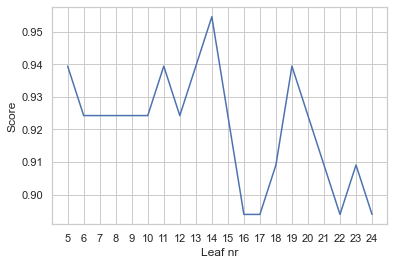

DT Max Score  0.9545454545454546


In [460]:
scores = []
for i in range(5,25):
    entropyTree = tree.DecisionTreeClassifier(criterion="entropy",max_leaf_nodes=i)
    entropyTree.fit(X_train, y_train)
    scores.append(entropyTree.score(X_test, y_test))
    
plt.plot(range(5,25), scores)
plt.xticks(np.arange(5,25))
plt.xlabel("Leaf nr")
plt.ylabel("Score")
plt.show()
maxLeaf = max(scores)
print("DT Max Score ",maxLeaf)

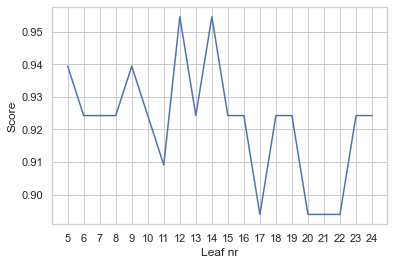

DT Max Score  0.9545454545454546


In [461]:
scores = []
for i in range(5,25):
    giniTree = tree.DecisionTreeClassifier(criterion="gini",max_leaf_nodes=i)
    giniTree.fit(X_train, y_train)
    scores.append(giniTree.score(X_test, y_test))
    
plt.plot(range(5,25), scores)
plt.xticks(np.arange(5,25))
plt.xlabel("Leaf nr")
plt.ylabel("Score")
plt.show()
maxLeaf = max(scores)
print("DT Max Score ",maxLeaf)